In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv(r"C:\Users\tendu\Desktop\us house\dataset.csv")
dataset.isna().sum()

DATE              0
GDP               0
MORTGAGE30US      0
MSPUS             0
TLRESCONS         0
MSACSR            0
PERMIT            0
INTDSRUSM193N     7
EVACANTUSQ176N    0
CSUSHPISA         0
dtype: int64

In [3]:
dataset.fillna(dataset["INTDSRUSM193N"].mean(),inplace=True)
dataset.isna().sum()

DATE              0
GDP               0
MORTGAGE30US      0
MSPUS             0
TLRESCONS         0
MSACSR            0
PERMIT            0
INTDSRUSM193N     0
EVACANTUSQ176N    0
CSUSHPISA         0
dtype: int64

In [4]:
dataset.tail()

,DATE,GDP,MORTGAGE30US,MSPUS,TLRESCONS,MSACSR,PERMIT,INTDSRUSM193N,EVACANTUSQ176N,CSUSHPISA
76,1/1/2022,24740.480,3.822308,433100,910611.0000,6.233333,1864.000000,1.961712,15166,290.868000
77,1/4/2022,25248.476,5.266154,449300,947300.3333,8.700000,1734.666667,1.961712,15286,303.422667
78,1/7/2022,25723.941,5.623077,468000,910346.0000,9.566667,1610.666667,1.961712,15306,301.726333
79,1/10/2022,26137.992,6.664615,479500,870620.6667,9.200000,1455.333333,1.961712,14554,297.896667
80,1/1/2023,26465.865,6.372308,436800,842559.6667,8.033333,1424.333333,1.961712,15053,297.896667


In [5]:
for col in dataset.columns:
    if col!="DATE":
        dataset[col]=pd.to_numeric(dataset[col])
dataset.tail()

,DATE,GDP,MORTGAGE30US,MSPUS,TLRESCONS,MSACSR,PERMIT,INTDSRUSM193N,EVACANTUSQ176N,CSUSHPISA
76,1/1/2022,24740.480,3.822308,433100,910611.0000,6.233333,1864.000000,1.961712,15166,290.868000
77,1/4/2022,25248.476,5.266154,449300,947300.3333,8.700000,1734.666667,1.961712,15286,303.422667
78,1/7/2022,25723.941,5.623077,468000,910346.0000,9.566667,1610.666667,1.961712,15306,301.726333
79,1/10/2022,26137.992,6.664615,479500,870620.6667,9.200000,1455.333333,1.961712,14554,297.896667
80,1/1/2023,26465.865,6.372308,436800,842559.6667,8.033333,1424.333333,1.961712,15053,297.896667


In [6]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
dataset.set_index('DATE', inplace=True)
dataset['year'] = dataset.index.to_period('Y').astype(str)
dataset

,GDP,MORTGAGE30US,MSPUS,TLRESCONS,MSACSR,PERMIT,INTDSRUSM193N,EVACANTUSQ176N,CSUSHPISA,year
DATE,,,,,,,,,,
2003-01-01,11174.129,5.840769,186000,421328.6667,4.200000,1806.333333,2.250000,14908,129.321000,2003
2003-01-04,11312.766,5.506923,191800,429308.6667,3.833333,1837.666667,2.166667,15244,131.756000,2003
2003-01-07,11566.669,6.033846,191900,458890.0000,3.633333,1937.333333,2.000000,15614,135.013000,2003
2003-01-10,11772.234,5.919286,198800,491437.3333,3.966667,1972.333333,2.000000,15654,138.835667,2003
2004-01-01,11923.447,5.597500,212700,506856.3333,3.700000,1994.666667,2.000000,15895,143.298667,2004
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,24740.480,3.822308,433100,910611.0000,6.233333,1864.000000,1.961712,15166,290.868000,2022
2022-01-04,25248.476,5.266154,449300,947300.3333,8.700000,1734.666667,1.961712,15286,303.422667,2022
2022-01-07,25723.941,5.623077,468000,910346.0000,9.566667,1610.666667,1.961712,15306,301.726333,2022


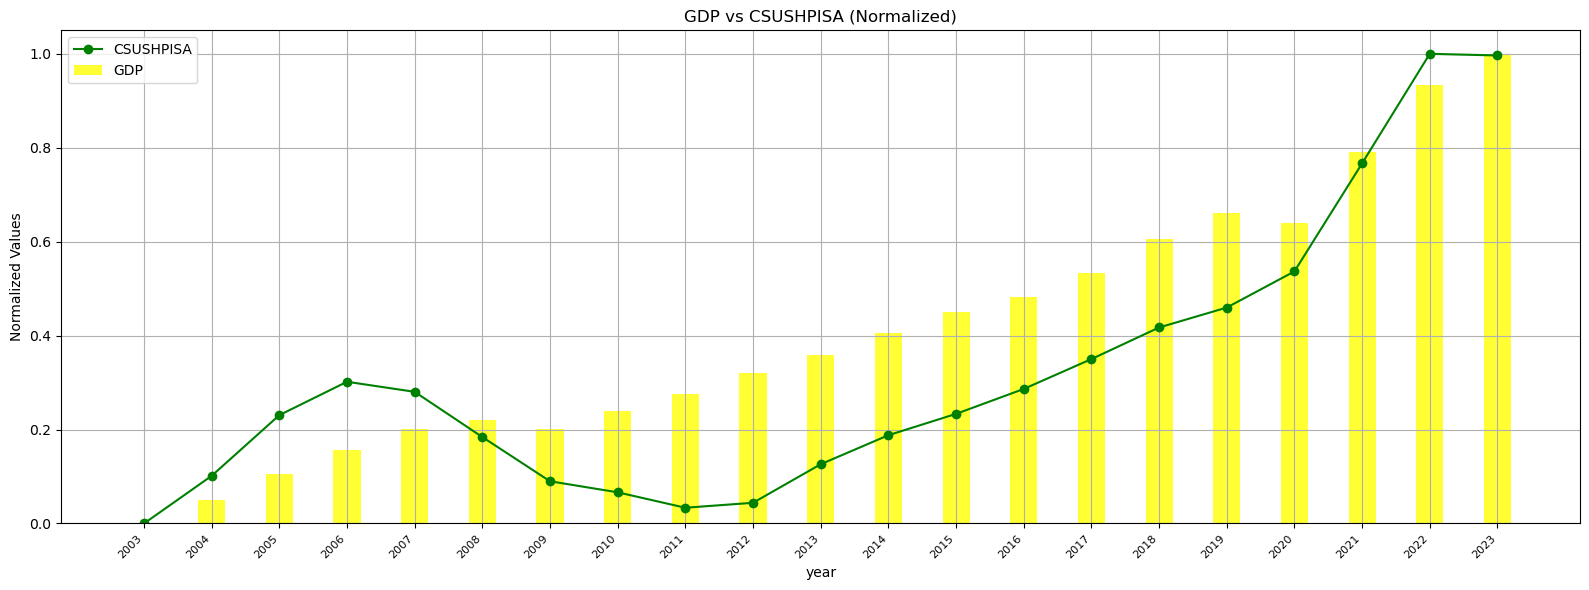

In [7]:
Analysation1 = dataset.groupby('year').agg({'GDP': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation1[['GDP', 'CSUSHPISA']] = scaler.fit_transform(Analysation1[['GDP', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation1['year'], Analysation1['GDP'], width=bar_width, alpha=opacity, color='yellow', label='GDP')
plt.plot(Analysation1['year'], Analysation1['CSUSHPISA'], marker='o', linestyle='-', color='green', label='CSUSHPISA')
plt.title('GDP vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

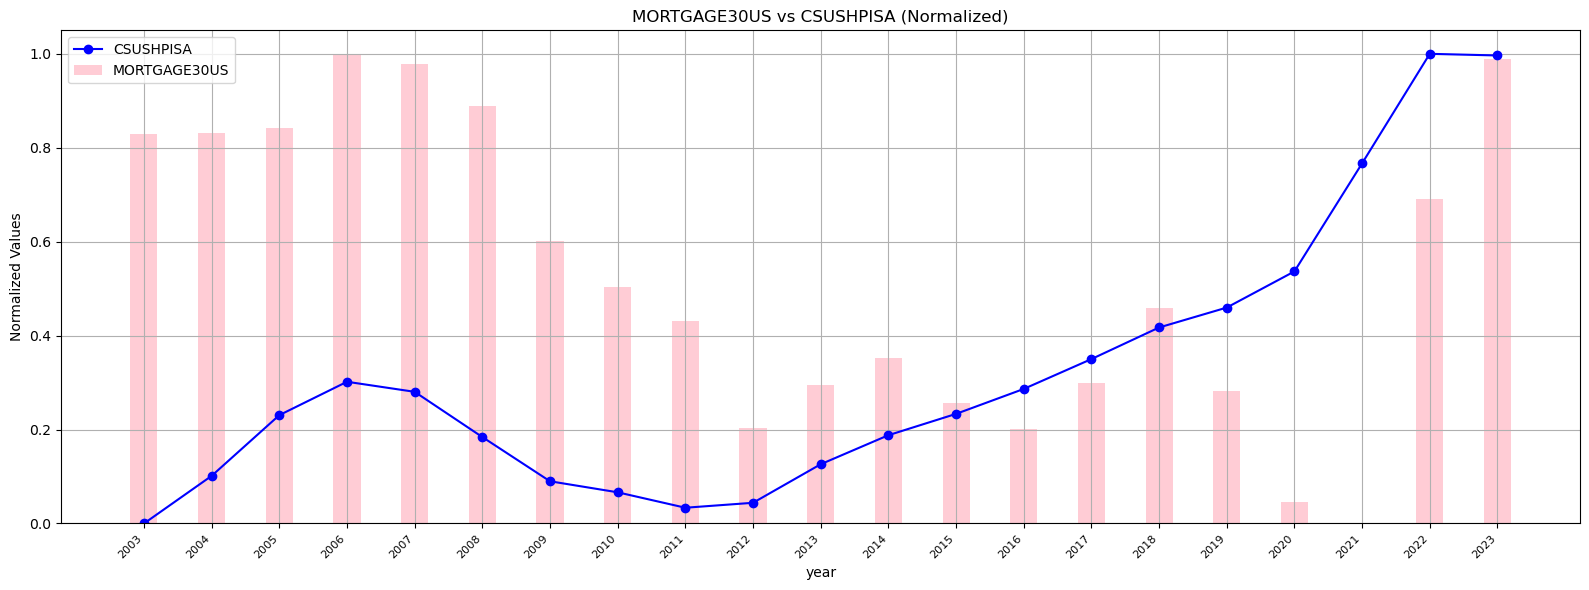

In [8]:
Analysation2 = dataset.groupby('year').agg({'MORTGAGE30US': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation2[['MORTGAGE30US', 'CSUSHPISA']] = scaler.fit_transform(Analysation2[['MORTGAGE30US', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation2['year'], Analysation2['MORTGAGE30US'], width=bar_width, alpha=opacity, color='pink', label='MORTGAGE30US')
plt.plot(Analysation2['year'], Analysation2['CSUSHPISA'], marker='o', linestyle='-', color='blue', label='CSUSHPISA')
plt.title('MORTGAGE30US vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

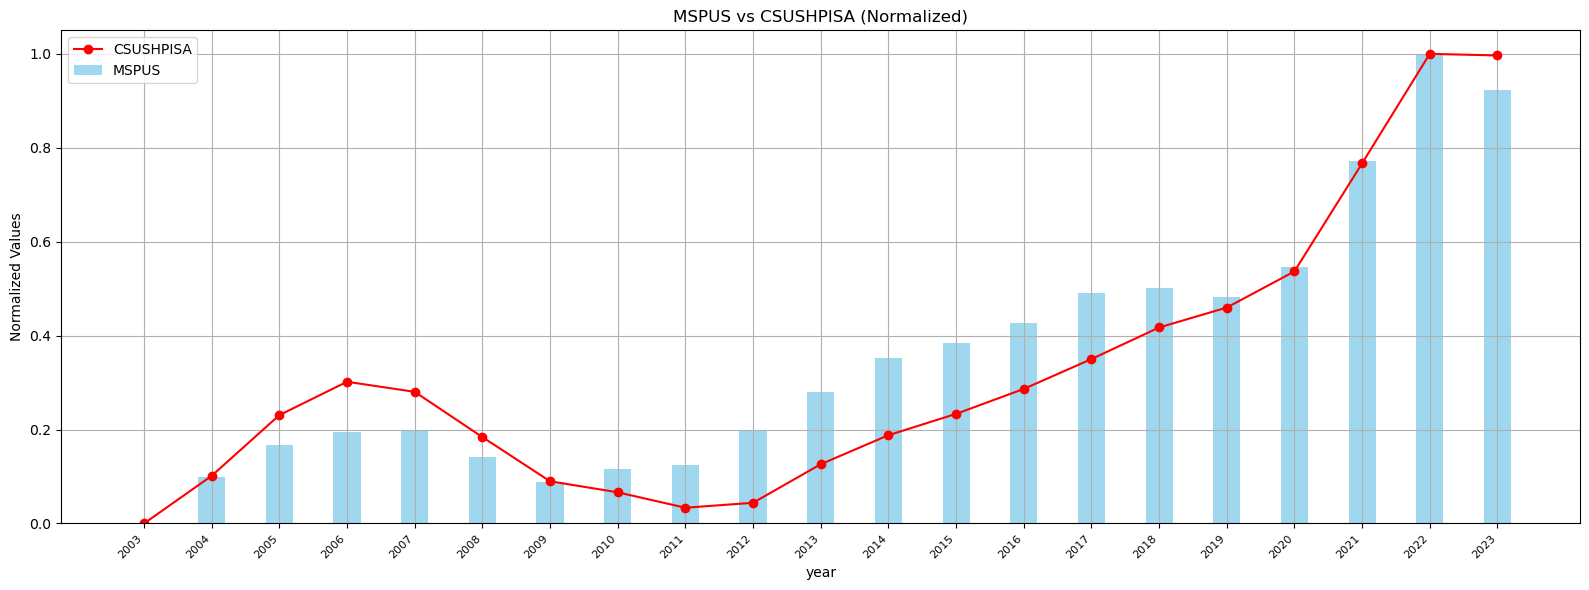

In [9]:
Analysation3 = dataset.groupby('year').agg({'MSPUS': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation3[['MSPUS', 'CSUSHPISA']] = scaler.fit_transform(Analysation3[['MSPUS', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation3['year'], Analysation3['MSPUS'], width=bar_width, alpha=opacity, color='skyblue', label='MSPUS')
plt.plot(Analysation3['year'], Analysation3['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')
plt.title('MSPUS vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

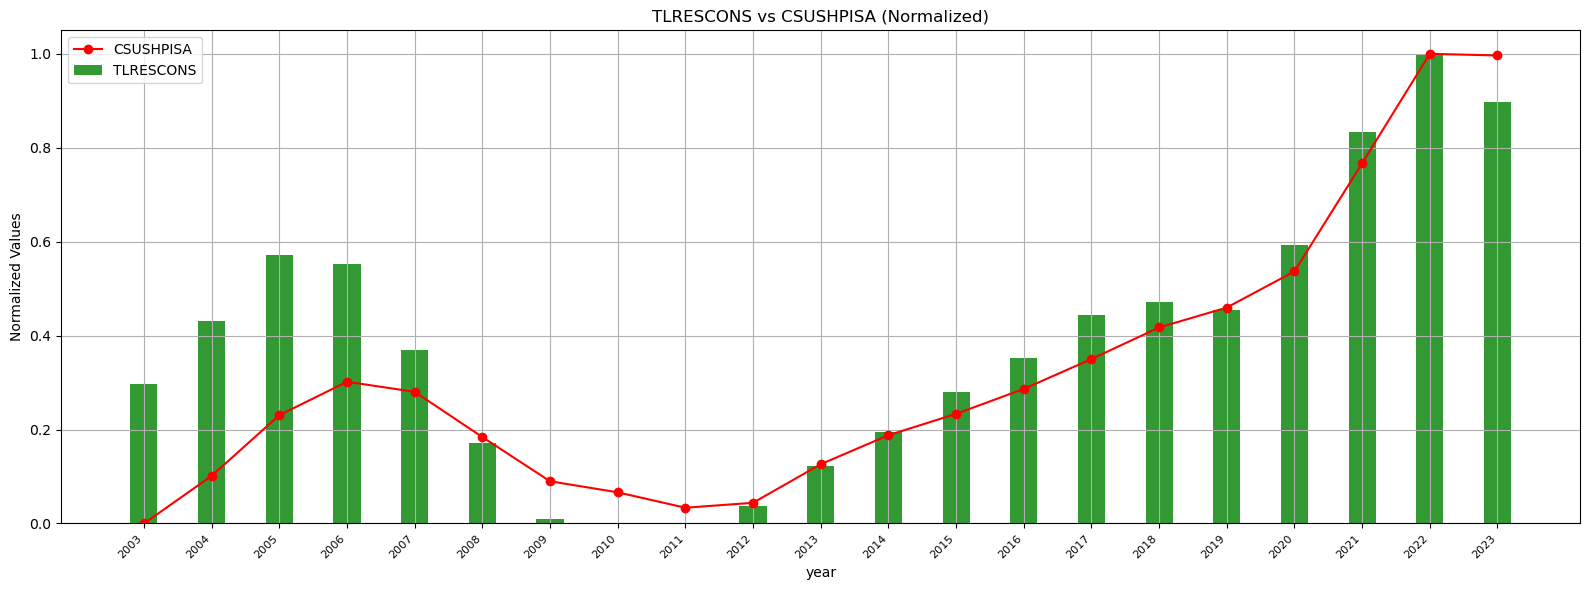

In [10]:
Analysation4 = dataset.groupby('year').agg({'TLRESCONS': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation4[['TLRESCONS', 'CSUSHPISA']] = scaler.fit_transform(Analysation4[['TLRESCONS', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation4['year'], Analysation4['TLRESCONS'], width=bar_width, alpha=opacity, color='green', label='TLRESCONS')
plt.plot(Analysation4['year'], Analysation4['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')
plt.title('TLRESCONS vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

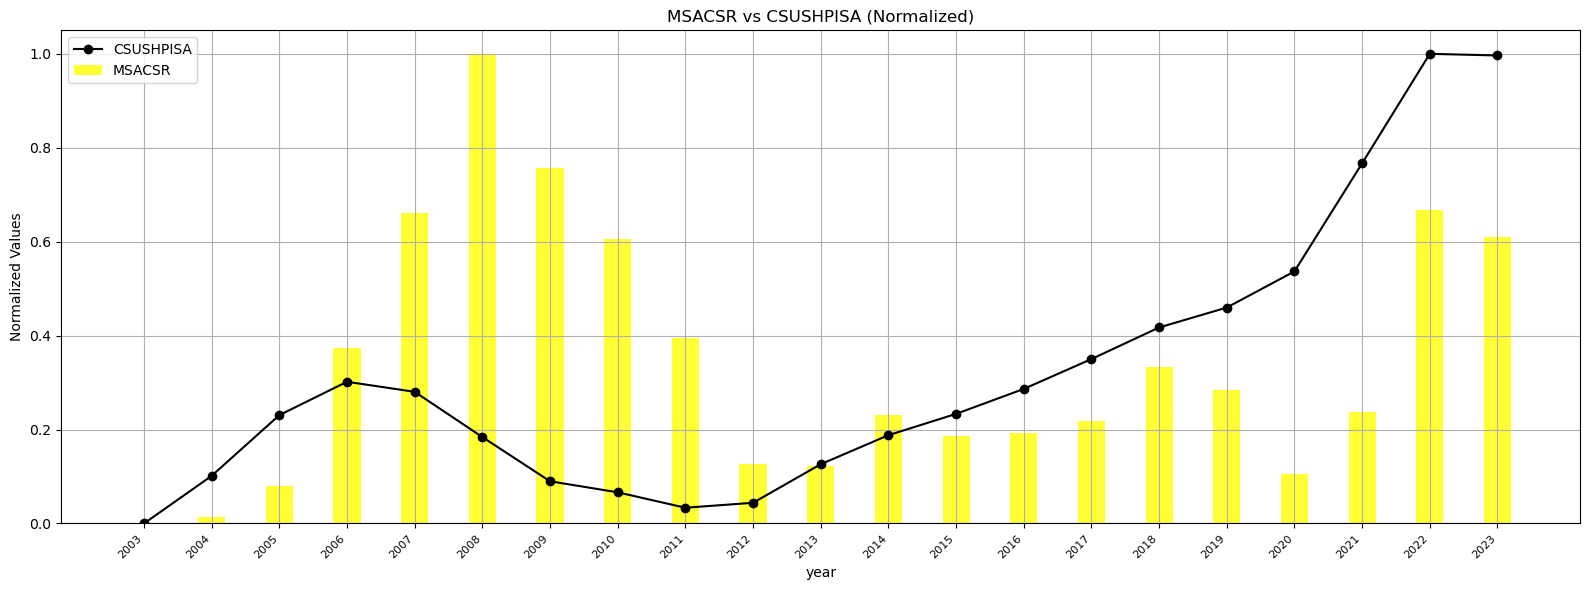

In [11]:
Analysation5 = dataset.groupby('year').agg({'MSACSR': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation5[['MSACSR', 'CSUSHPISA']] = scaler.fit_transform(Analysation5[['MSACSR', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation5['year'], Analysation5['MSACSR'], width=bar_width, alpha=opacity, color='yellow', label='MSACSR')
plt.plot(Analysation5['year'], Analysation5['CSUSHPISA'], marker='o', linestyle='-', color='black', label='CSUSHPISA')
plt.title('MSACSR vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

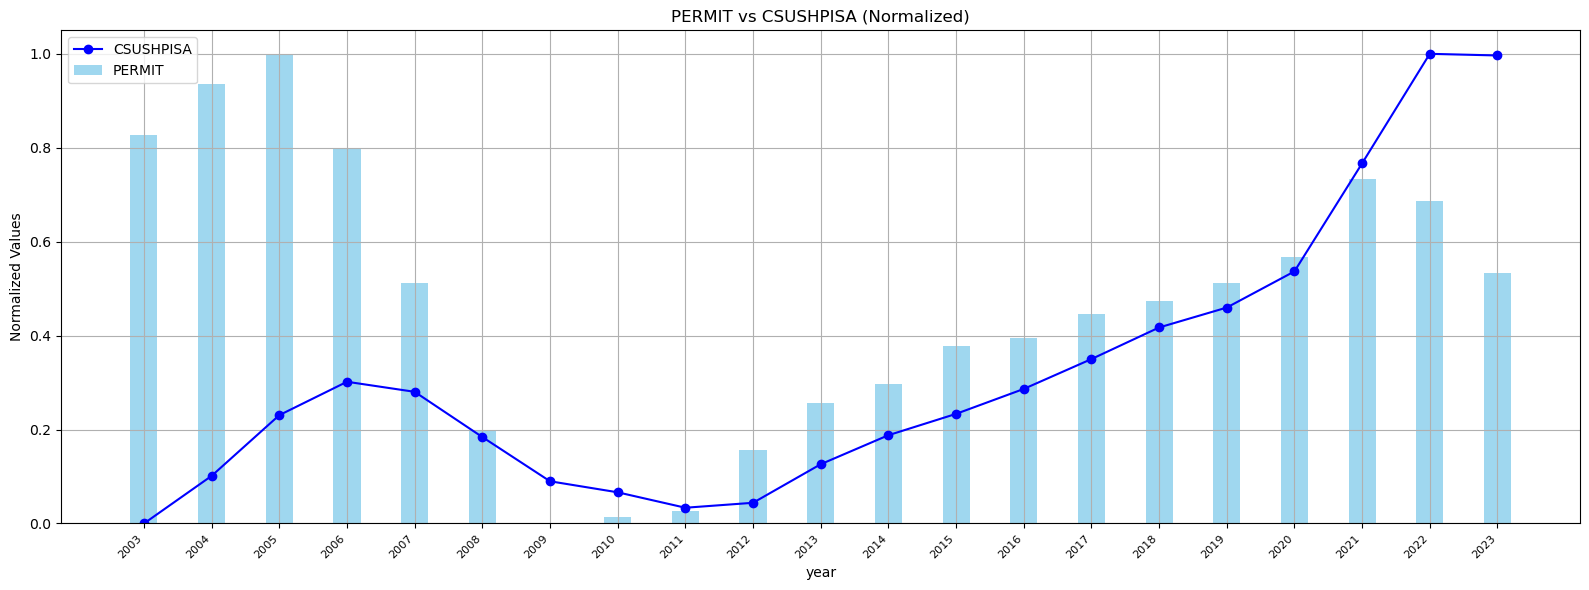

In [12]:
Analysation6 = dataset.groupby('year').agg({'PERMIT': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation6[['PERMIT', 'CSUSHPISA']] = scaler.fit_transform(Analysation6[['PERMIT', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation6['year'], Analysation6['PERMIT'], width=bar_width, alpha=opacity, color='skyblue', label='PERMIT')
plt.plot(Analysation6['year'], Analysation6['CSUSHPISA'], marker='o', linestyle='-', color='blue', label='CSUSHPISA')
plt.title('PERMIT vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

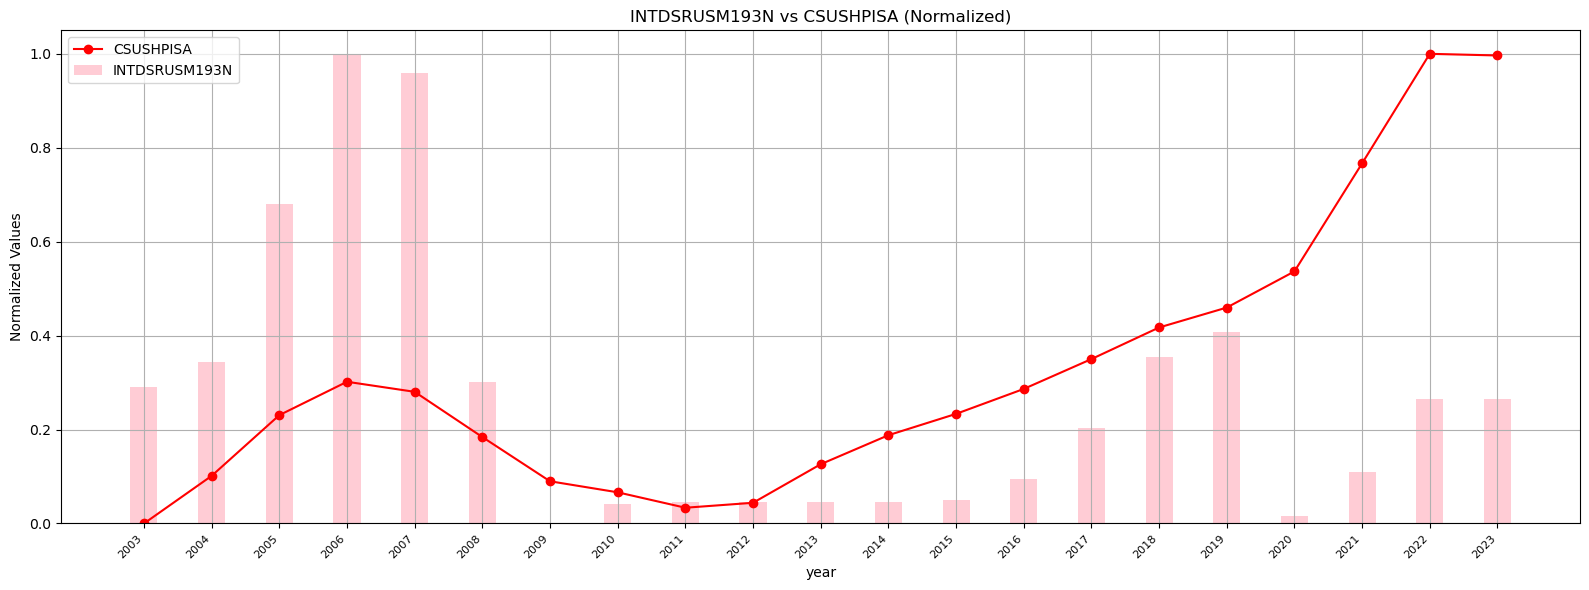

In [13]:
Analysation7 = dataset.groupby('year').agg({'INTDSRUSM193N': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation7[['INTDSRUSM193N', 'CSUSHPISA']] = scaler.fit_transform(Analysation7[['INTDSRUSM193N', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation7['year'], Analysation7['INTDSRUSM193N'], width=bar_width, alpha=opacity, color='pink', label='INTDSRUSM193N')
plt.plot(Analysation7['year'], Analysation7['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')
plt.title('INTDSRUSM193N vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

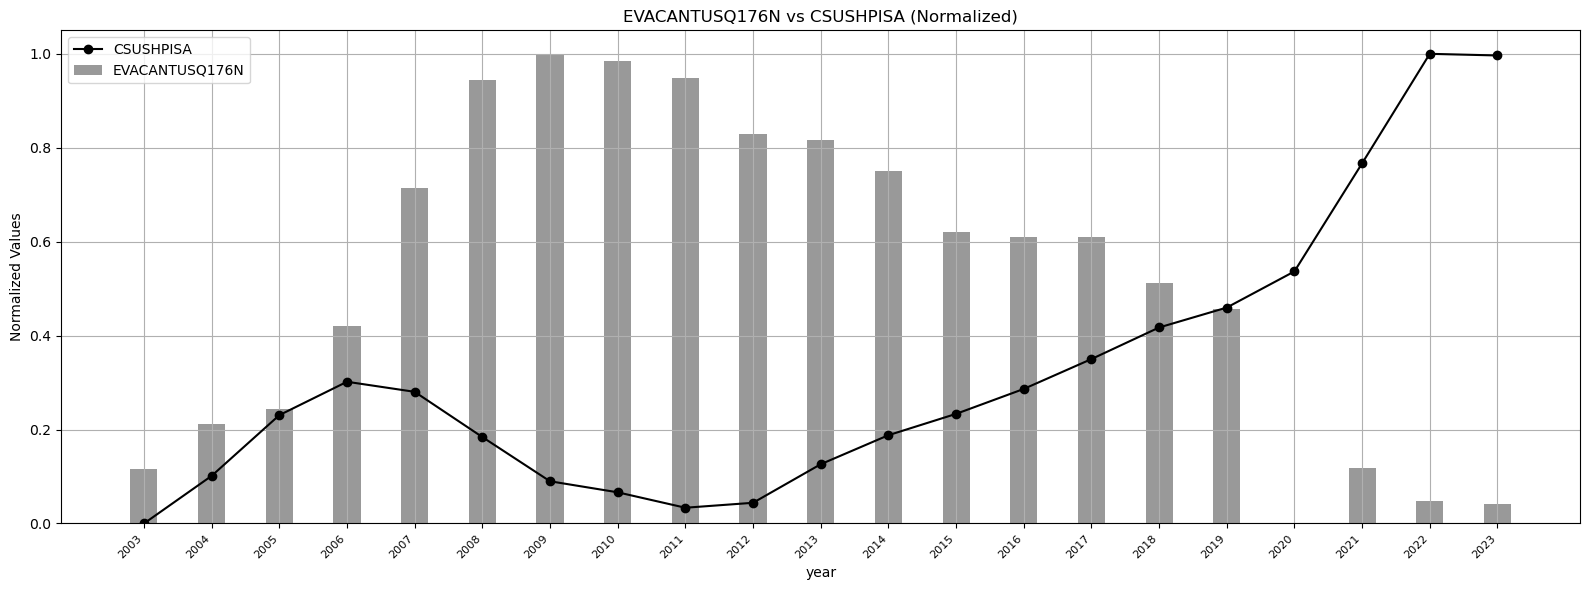

In [14]:
Analysation8 = dataset.groupby('year').agg({'EVACANTUSQ176N': 'mean', 'CSUSHPISA': 'mean'}).reset_index()
scaler = MinMaxScaler()
Analysation8[['EVACANTUSQ176N', 'CSUSHPISA']] = scaler.fit_transform(Analysation8[['EVACANTUSQ176N', 'CSUSHPISA']])
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8
plt.bar(Analysation8['year'], Analysation8['EVACANTUSQ176N'], width=bar_width, alpha=opacity, color='grey', label='EVACANTUSQ176N')
plt.plot(Analysation8['year'], Analysation8['CSUSHPISA'], marker='o', linestyle='-', color='black', label='CSUSHPISA')
plt.title('EVACANTUSQ176N vs CSUSHPISA (Normalized)')
plt.xlabel('year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

Importing the required libraries

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

Building models over iterations and measuring their mean square error

In [16]:
features = ['GDP','MORTGAGE30US','MSPUS','TLRESCONS','MSACSR','PERMIT','INTDSRUSM193N','EVACANTUSQ176N']
target = 'CSUSHPISA'

X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
}
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    results[model_name] = avg_mse

In [17]:
best_model = min(results, key=results.get)
best_model_instance = models[best_model]

best_model_instance.fit(X_train, y_train)


predictions = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, predictions)


print("Model Selection Results:")
for model, mse_score in results.items():
    print(f"{model}: MSE={mse_score}")

print(f"\nBest Model: {best_model}")
print(f"Best Model MSE on Testing Set: {mse}")

Model Selection Results:
Linear Regression: MSE=24.22358092478297
Decision Tree: MSE=125.6473648554306
Random Forest: MSE=56.6604188270703
Support Vector Regression: MSE=1704.7329234887188

Best Model: Linear Regression
Best Model MSE on Testing Set: 8.233431786911389


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print("R-squared score:", r2)

R-squared score: 0.9931333101201352


In [19]:
best_model_instance.fit(X_train, y_train)

coefficients = best_model_instance.coef_

print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

Coefficients:
GDP: 0.0036304552179840894
MORTGAGE30US: -0.5805671943921097
MSPUS: 3.5635833361084466e-05
TLRESCONS: 0.00017831750037155638
MSACSR: 3.198551086453817
PERMIT: -0.019953376507397404
INTDSRUSM193N: 1.0115931534478504
EVACANTUSQ176N: -0.002628399778930935
